In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

C:\Users\tripa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

df=pd.read_csv(r"C:\Users\tripa\Downloads\new_york_listings_2024.csv")
display(df.head())
print('- - - - - - - '*9)
print(df.shape)
print('- - - - - - - '*9)
print(df.columns)
print('- - - - - - - '*9)
print(df.isnull().sum())
print('- - - - - - - '*9)
print(df.info())


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
(20758, 22)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                    

In [4]:
# Feature Engineering
df['rental_income'] = df['price'] * df['availability_365']
df['revenue_per_bedroom'] = df['rental_income'] / pd.to_numeric(df['bedrooms'], errors='coerce')
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
df = df.dropna(subset=['rental_income', 'revenue_per_bedroom', 'beds', 'baths', 'neighbourhood'])









In [5]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)  # 25th percentile
        Q3 = data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
#Columns for outlier detection
outlier_columns = ['rental_income', 'revenue_per_bedroom', 'price', 'beds', 'baths']
df = remove_outliers_iqr(df, outlier_columns)

# Features and Target
features = df[['price', 'availability_365', 'number_of_reviews',
               'calculated_host_listings_count', 'beds', 'baths']]
target = df['revenue_per_bedroom'].loc[features.index]

# Display columns with outliers
print("Columns with outliers removed:")
print(outlier_columns)

Columns with outliers removed:
['rental_income', 'revenue_per_bedroom', 'price', 'beds', 'baths']


In [6]:
target = df['revenue_per_bedroom'].loc[features.index]
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target)
predictions = rf.predict(features)
r2 = r2_score(target, predictions)
print(f"R-squared (Accuracy): {r2:.2f}")

R-squared (Accuracy): 0.99


Top 10 Important Features:
availability_365                  0.640807
price                             0.268370
beds                              0.046370
number_of_reviews                 0.028977
calculated_host_listings_count    0.015476
baths                             0.000000
dtype: float64


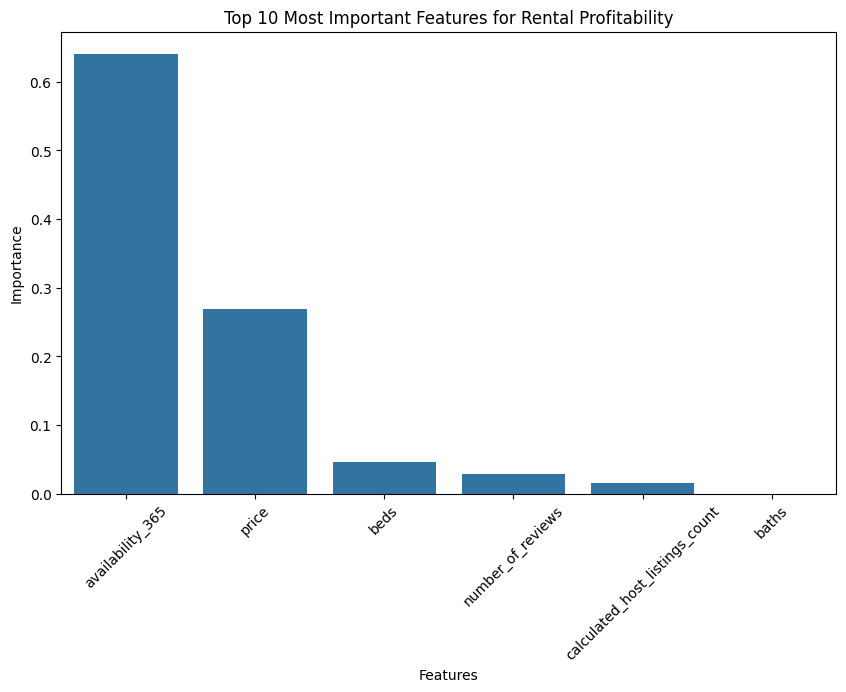

In [7]:
# Feature Importances
feature_importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10).index, y=feature_importances.head(10).values)
plt.title("Top 10 Most Important Features for Rental Profitability")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


Top 10 Most Profitable Neighborhoods (Average Revenue per Bedroom):
                rental_income  revenue_per_bedroom
neighbourhood                                     
Breezy Point     54600.000000         54600.000000
Port Morris      41802.357143         38279.964286
Midland Beach    41948.750000         35378.750000
Graniteville     34762.000000         34762.000000
Rossville        34580.000000         34580.000000
Edenwald         34537.416667         34537.416667
Murray Hill      38979.600000         34355.875000
Middle Village   38396.250000         34017.666667
Castle Hill      51925.000000         33890.000000
Huguenot         33712.000000         33712.000000


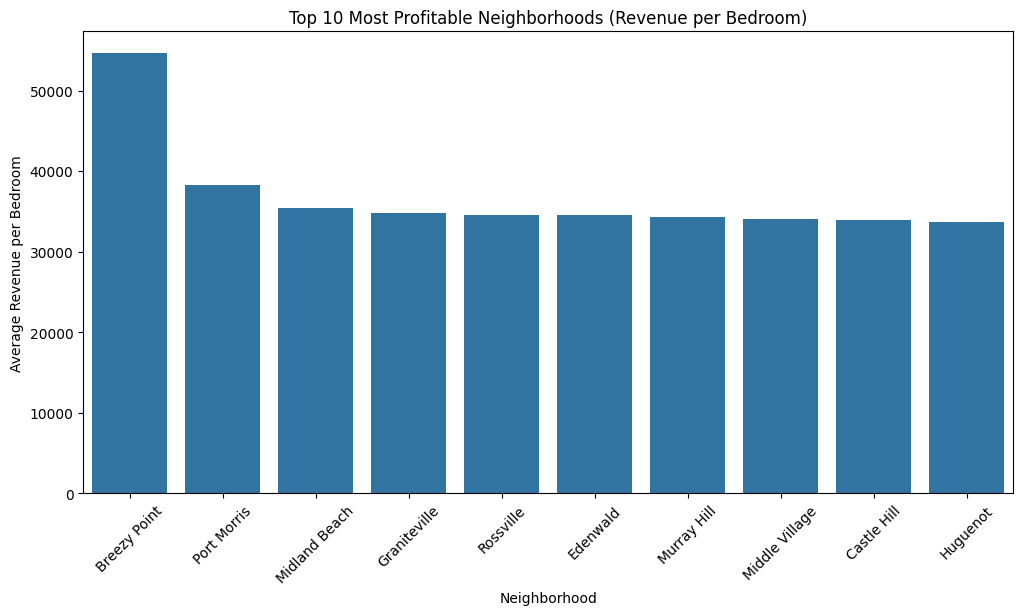

In [8]:
# Analyze Neighborhood Profitability
neighborhood_profitability = df.groupby('neighbourhood').agg({
    'rental_income': 'mean',
    'revenue_per_bedroom': 'mean'
}).sort_values(by='revenue_per_bedroom', ascending=False).head(10)

print("\nTop 10 Most Profitable Neighborhoods (Average Revenue per Bedroom):")
print(neighborhood_profitability)

plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_profitability.index, y=neighborhood_profitability['revenue_per_bedroom'])
plt.title("Top 10 Most Profitable Neighborhoods (Revenue per Bedroom)")
plt.xlabel('Neighborhood')
plt.ylabel('Average Revenue per Bedroom')
plt.xticks(rotation=45)
plt.show()


Top 10 Most Profitable Features: Number of Beds (Revenue per Bedroom):
      rental_income  revenue_per_bedroom
beds                                    
2      29449.234973         21852.975764
1      19199.140293         18827.227394
3      33139.975546         18384.254585


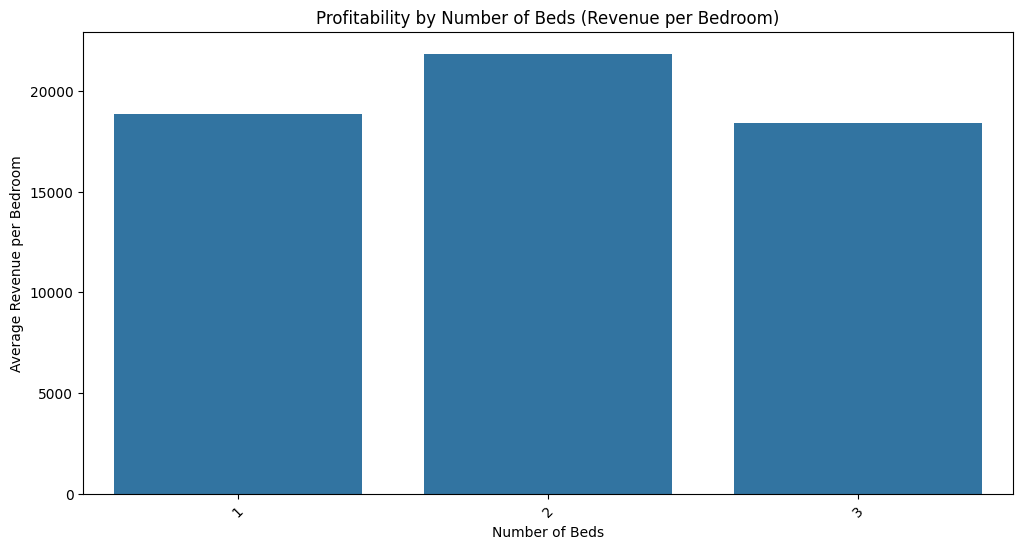

In [10]:
#Identify Profitable Features of a House
beds_profitability = df.groupby('beds').agg({
    'rental_income': 'mean',
    'revenue_per_bedroom': 'mean'
}).sort_values(by='revenue_per_bedroom', ascending=False).head(10)

print("\nTop 10 Most Profitable Features: Number of Beds (Revenue per Bedroom):")
print(beds_profitability)

# Plot Profitable Features (Beds)
plt.figure(figsize=(12, 6))
sns.barplot(x=beds_profitability.index, y=beds_profitability['revenue_per_bedroom'])
plt.title("Profitability by Number of Beds (Revenue per Bedroom)")
plt.xlabel('Number of Beds')
plt.ylabel('Average Revenue per Bedroom')
plt.xticks(rotation=45)
plt.show()




In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Models
lr.fit(features, target)
dt.fit(features, target)
rf.fit(features, target)

# Predictions
lr_preds = lr.predict(features)
dt_preds = dt.predict(features)
rf_preds = rf.predict(features)

# Evaluation Function
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

# Compare Models
lr_results = evaluate_model("Linear Regression", target, lr_preds)
dt_results = evaluate_model("Decision Tree", target, dt_preds)
rf_results = evaluate_model("Random Forest", target, rf_preds)

# Print Results
print(lr_results)
print(dt_results)
print(rf_results)

{'Model': 'Linear Regression', 'MAE': 6158.542768859147, 'RMSE': 8045.1088413772895, 'R²': 0.7673372020097519}
{'Model': 'Decision Tree', 'MAE': 17.921312097080015, 'RMSE': 455.0293682814435, 'R²': 0.9992557103946025}
{'Model': 'Random Forest', 'MAE': 924.3496416114391, 'RMSE': 2033.4391795866477, 'R²': 0.9851363499112527}


C:\Users\tripa\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tripa\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tripa\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
#Hyperparameter Tuninig For Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples to split
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(features, target)

best_rf_model = grid_search.best_estimator_

# Predict using the best model
best_rf_preds = best_rf_model.predict(features)

# Evaluate the optimized model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

best_rf_results = evaluate_model("Tuned Random Forest", target, best_rf_preds)

print(f"Best Model R² Score: {best_rf_results['R²']:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Model R² Score: 0.94
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


C:\Users\tripa\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### The Best Model with good R^2 is Decision Tree but it could be due to Overfitting, So it is not good for real world problems so we would go with Fine tuned Random Forest model

In [19]:
import joblib

# Save the best-tuned RandomForest model
joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')

print("✅ Tuned RandomForest model saved successfully!")

✅ Tuned RandomForest model saved successfully!


In [20]:
print("Model was trained on these features:", best_rf_model.feature_names_in_)
print("API is receiving these features:", [
    "price_per_bedroom", "bedrooms", "beds", "baths",
    "room_type_Private_room", "longitude",
    "neighbourhood_group_Manhattan", "occupancy_rate",
    "revenue_per_bedroom"
])

Model was trained on these features: ['price' 'availability_365' 'number_of_reviews'
 'calculated_host_listings_count' 'beds' 'baths']
API is receiving these features: ['price_per_bedroom', 'bedrooms', 'beds', 'baths', 'room_type_Private_room', 'longitude', 'neighbourhood_group_Manhattan', 'occupancy_rate', 'revenue_per_bedroom']
